This code makes a movie of one macroscale run.

It plots the fibrin fibers (black lines, and blue dots for the fibers coming out of the page), bound tPA (green asterisk), and unbound tPA (black asterisk).

In [1]:
close all
clear all

In [2]:
graphics_toolkit("qt");
expCode = '2022-12-20-1600';
fileCode = 'tPA425_PLG2_tPA01_into_and_along_Q2.dat';
folder = strcat('../../data/', expCode);

In [3]:
isBinary = 1;
arch = 'lin'
if (isBinary ~= 0 & isBinary ~=1)
    disp('Problem with isBinary')
    pause
end;
iflag = 0;
binaryformat='native';
if arch == 'sun',
     binaryformat = 'ieee-be'
else 
    binaryformat = 'ieee-le'    
end;

arch = lin
binaryformat = ieee-le


In [4]:
% Make sure you change N, F, Ffree, and M to be the same values as you used 
% in the corresponding macroscale model run.
N = 93; %23;%69;%35;%69;
F = 121; %35;%103;%36;%52;%71;
%Free=13;%35;%2;%18;%3;
%stats=10;
M = 43074; %200;%3590;%7179;%43074;%57190;%772;%2422;%1544;%685000;
num = (2*N-1)*F + N*(F-1);

In [5]:

% Find and replace all the file name endings to correspond to the names you
% used in the macroscale model. There should be 17 names that change.

% DON'T DO THIS ANY MORE.
% Just change the "fileCode" variable above

% ("lowPLG_tPA018_coarse.dat")
fids(1) = fopen(strcat(folder, '/X1plot_', fileCode), 'r', binaryformat);
X1plotc = fread(fids(1),[2,F*(N-1)],'int');
fclose(fids(1));

fids(2) = fopen(strcat(folder, '/X2plot_', fileCode),'r',binaryformat);
X2plotc = fread(fids(2),[2,N*(F-1)],'int');
fclose(fids(2));

fids(3) = fopen(strcat(folder, '/Y1plot_', fileCode),'r',binaryformat);
Y1plotc = fread(fids(3),[2,F*(N-1)],'int');
fclose(fids(3));

fids(4) = fopen(strcat(folder, '/Y2plot_', fileCode),'r',binaryformat);
Y2plotc = fread(fids(4),[2,N*(F-1)],'int');
fclose(fids(4));

fids(5) = fopen(strcat(folder, '/Xvplot_', fileCode),'r',binaryformat);
tempc = fread(fids(5),inf,'int');
npltc=length(tempc)/(F*N);
fclose(fids(5));

fids(5) = fopen(strcat(folder, '/Xvplot_', fileCode),'r',binaryformat);
Xvplotc = fread(fids(5),N*F,'int');
fclose(fids(5));

fids(6) = fopen(strcat(folder, '/Yvplot_', fileCode),'r',binaryformat);
Yvplotc = fread(fids(6),N*F,'int');
fclose(fids(6));

fids(7) = fopen(strcat(folder, '/tPAbd_', fileCode),'r',binaryformat);
bdtPAc = fread(fids(7),[2,M],'double');
fclose(fids(7));

fids(8) = fopen(strcat(folder, '/tPAfree_', fileCode),'r',binaryformat);
freetPAc = fread(fids(8),[2,M],'double');
fclose(fids(8));

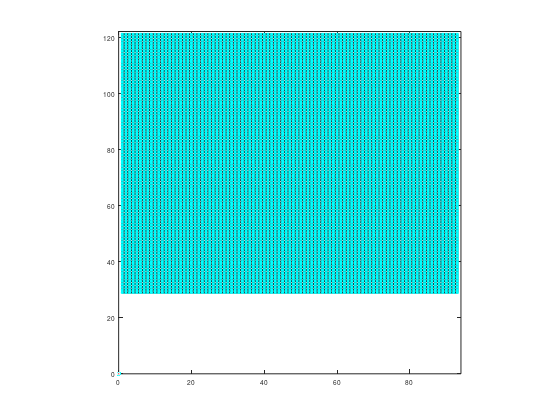

In [6]:
%First plot initial condition

for i=1:2
    for j=1:M
        if bdtPAc(i,j)==-1
            bdtPAc(i,j)=NaN;
        end
    end
end


X1totc(1)=X1plotc(1,1);
X1totc(2)=X1plotc(2,1);
X1totc(3)=NaN;
Y1totc(1)=Y1plotc(1,1);
Y1totc(2)=Y1plotc(2,1);
Y1totc(3)=NaN;

for i=1:F*(N-1)-1
    X1totc(1+3*i)=X1plotc(1,i+1);
    X1totc(2+3*i)=X1plotc(2,i+1);
    X1totc(3+3*i)=NaN;
    Y1totc(1+3*i)=Y1plotc(1,i+1);
    Y1totc(2+3*i)=Y1plotc(2,i+1);
    Y1totc(3+3*i)=NaN;
end

X2totc(1)=X2plotc(1,1);
X2totc(2)=X2plotc(2,1);
X2totc(3)=NaN;
Y2totc(1)=Y2plotc(1,1);
Y2totc(2)=Y2plotc(2,1);
Y2totc(3)=NaN;

for i=1:N*(F-1)-1
    X2totc(1+3*i)=X2plotc(1,i+1);
    X2totc(2+3*i)=X2plotc(2,i+1);
    X2totc(3+3*i)=NaN;
    Y2totc(1+3*i)=Y2plotc(1,i+1);
    Y2totc(2+3*i)=Y2plotc(2,i+1);
    Y2totc(3+3*i)=NaN;
end


X1tot_oldc=X1totc;
X2tot_oldc=X2totc;
Y1tot_oldc=Y1totc;
Y2tot_oldc=Y2totc;
Xvplot_oldc=Xvplotc;
Yvplot_oldc=Yvplotc;


set(0,'Units','pixels') 
scnsize = get(0,'ScreenSize');
fh=figure(3);
position = [1280 650 1280 650];
outerpos = get(fh,'OuterPosition');
set(fh,'OuterPosition',position)
plot(X1totc,Y1totc,'k','LineWidth',2)
axis([0 (N+1) 0 (F+1)])
hold on
plot(X2totc,Y2totc,'k','LineWidth',2)
plot(Xvplotc,Yvplotc,'cs','MarkerFaceColor','c','MarkerSize',2)
plot(0,0,'ws','MarkerFaceColor','r','MarkerSize',2)
axis square
hold off

Fmov2(1)=getframe(gcf);

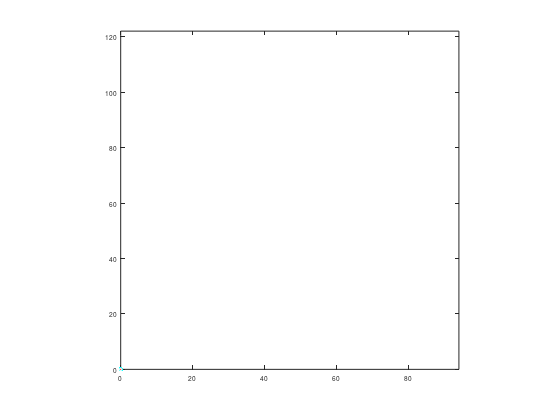

In [7]:
fids(1) = fopen(strcat(folder, '/X1plot_', fileCode),'r',binaryformat);
fids(2) = fopen(strcat(folder, '/X2plot_', fileCode),'r',binaryformat);
fids(3) = fopen(strcat(folder, '/Y1plot_', fileCode),'r',binaryformat);
fids(4) = fopen(strcat(folder, '/Y2plot_', fileCode),'r',binaryformat);
fids(5) = fopen(strcat(folder, '/Xvplot_', fileCode),'r',binaryformat);
fids(6) = fopen(strcat(folder, '/Yvplot_', fileCode),'r',binaryformat);
fids(7) = fopen(strcat(folder, '/tPAbd_', fileCode),'r',binaryformat);
%fids(8) = fopen(strcat(folder, '/tPAfree_', fileCode),'r',binaryformat);


for iplt=2:npltc
    X1plotc = fread(fids(1),[2,F*(N-1)],'int');
    X2plotc = fread(fids(2),[2,N*(F-1)],'int');
    Y1plotc = fread(fids(3),[2,F*(N-1)],'int');
    Y2plotc = fread(fids(4),[2,N*(F-1)],'int');
    Xvplotc = fread(fids(5),N*F,'int');
    Yvplotc = fread(fids(6),N*F,'int');
    bdtPAc = fread(fids(7),[2,M],'double');
    %freetPAc = fread(fids(8),[2,M],'double');
    
    
    for i=1:2
        for j=1:M
            if bdtPAc(i,j)==-1
                bdtPAc(i,j)=NaN;
            end
        end
    end
   
    
    X1totc(1)=X1plotc(1,1);
    X1totc(2)=X1plotc(2,1);
    X1totc(3)=NaN;
    Y1totc(1)=Y1plotc(1,1);
    Y1totc(2)=Y1plotc(2,1);
    Y1totc(3)=NaN;
   
    
    for i=1:F*(N-1)-1
        X1totc(1+3*i)=X1plotc(1,i+1);
        X1totc(2+3*i)=X1plotc(2,i+1);
        X1totc(3+3*i)=NaN;
        Y1totc(1+3*i)=Y1plotc(1,i+1);
        Y1totc(2+3*i)=Y1plotc(2,i+1);
        Y1totc(3+3*i)=NaN;
    end
   
    X2totc(1)=X2plotc(1,1);
    X2totc(2)=X2plotc(2,1);
    X2totc(3)=NaN;
    Y2totc(1)=Y2plotc(1,1);
    Y2totc(2)=Y2plotc(2,1);
    Y2totc(3)=NaN;
    

    for i=1:N*(F-1)-1
        X2totc(1+3*i)=X2plotc(1,i+1);
        X2totc(2+3*i)=X2plotc(2,i+1);
        X2totc(3+3*i)=NaN;
        Y2totc(1+3*i)=Y2plotc(1,i+1);
        Y2totc(2+3*i)=Y2plotc(2,i+1);
        Y2totc(3+3*i)=NaN;
    end

    
    fh=figure(3);
    position = [1280 650 1280 650];%get(fh,'Position');
    outerpos = get(fh,'OuterPosition');
    set(fh,'OuterPosition',position)
    plot(X1totc,Y1totc,'k','LineWidth',2)
    axis([0 (N+1) 0 (F+1)])
    hold on
    plot(X2totc,Y2totc,'k','LineWidth',2)
    plot(Xvplotc,Yvplotc,'cs','MarkerFaceColor','c','MarkerSize',2)
    plot(bdtPAc(1,:),bdtPAc(2,:),'g*')
    %plot(freetPAc(1,:),freetPAc(2,:),'k*')
    plot(0,0,'ws','MarkerFaceColor','r','MarkerSize',2)
    axis square
    hold off
    
    Fmov2(iplt)=getframe(gcf); 
end

fclose(fids(1));
fclose(fids(2));
fclose(fids(3));
fclose(fids(4));
fclose(fids(5));
fclose(fids(6));
fclose(fids(7));

% %To save the movie, either uncomment the bottom, or copy and paste it into
% %the Matlab command line after the movie has finished running. Make sure
% %you rename the file (the 'movie_case1k_fine.avi' part) to correspond to
% %the name of the run you are doing.

%movie2avi(Fmov2,'movie_case1k_fine.avi','fps',2);

In [8]:
movie2avi(Fmov2,'movie_case1k_fine.avi','fps',2);

Can't locate Texinfo/ModulePath.pm in @INC (you may need to install the Texinfo::ModulePath module) (@INC contains: \mingw64\share\texinfo C:/ProgramData/Anaconda3/envs/lysis/Library/vendor/lib C:/ProgramData/Anaconda3/envs/lysis/Library/lib) at makeinfo line 82.
BEGIN failed--compilation aborted at makeinfo line 85.
Can't locate Texinfo/ModulePath.pm in @INC (you may need to install the Texinfo::ModulePath module) (@INC contains: \mingw64\share\texinfo C:/ProgramData/Anaconda3/envs/lysis/Library/vendor/lib C:/ProgramData/Anaconda3/envs/lysis/Library/lib) at makeinfo line 82.
BEGIN failed--compilation aborted at makeinfo line 85.
error: 'movie2avi' undefined near line 1, column 1
